# Assignment 4: Gaussian Mixture Models

**1. Retrieve and load the Olivetti faces dataset.**

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
# Load the dataset
data = fetch_olivetti_faces()
X = data.data
y = data.target

In [3]:
y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

**2. Split the dataset into training, validation, and test sets using stratified sampling to ensure that each set contains the same number of images per person.**

In [4]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
# Split the remaining data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

**3. Apply PCA on the data, preserving 99% of the variance, to reduce the dataset’s dimensionality.**

In [5]:
# Perform PCA with 99% variance explained and whitening
pca = PCA(0.99, whiten=True)

# Transform the training data
X_train_pca = pca.fit_transform(X_train)

# Transform the validation data
X_val_pca = pca.transform(X_val)

# Transform the test data
X_test_pca = pca.transform(X_test)

**4. Determine the most suitable covariance type for the dataset.**

In [6]:
# Try different covariance types and pick the one with the best score
covariance_types = ['full', 'tied', 'diag', 'spherical']
scores = {}

for cov_type in covariance_types:
    gmm = GaussianMixture(n_components=40, covariance_type=cov_type, random_state=42)
    gmm.fit(X_train_pca)
    scores[cov_type] = gmm.bic(X_val_pca)  
best_cov_type = min(scores, key=scores.get)
print(f"Best covariance type according to BIC: {best_cov_type}")

Best covariance type according to BIC: spherical


**5. Determine the minimum number of clusters that best represent the dataset using either AIC or BIC.**

In [7]:
# Calculate BIC scores for different number of clusters
bic_scores = []
n_components_range = range(1, 41)

for n_components in n_components_range:
    # Create Gaussian Mixture Model with specified number of components and covariance type
    gmm = GaussianMixture(n_components=n_components, covariance_type=best_cov_type, random_state=42)
    gmm.fit(X_train_pca)
    
    # Calculate BIC score for the current number of components
    bic_scores.append(gmm.bic(X_val_pca))

# Find the optimal number of clusters based on AIC and BIC scores
optimal_clusters_bic = n_components_range[bic_scores.index(min(bic_scores))]

# Print the optimal number of clusters based on AIC and BIC scores
print(f"Optimal number of clusters (BIC): {optimal_clusters_bic}")

Optimal number of clusters (BIC): 1


**6. Plot the results from steps 3 and 4**

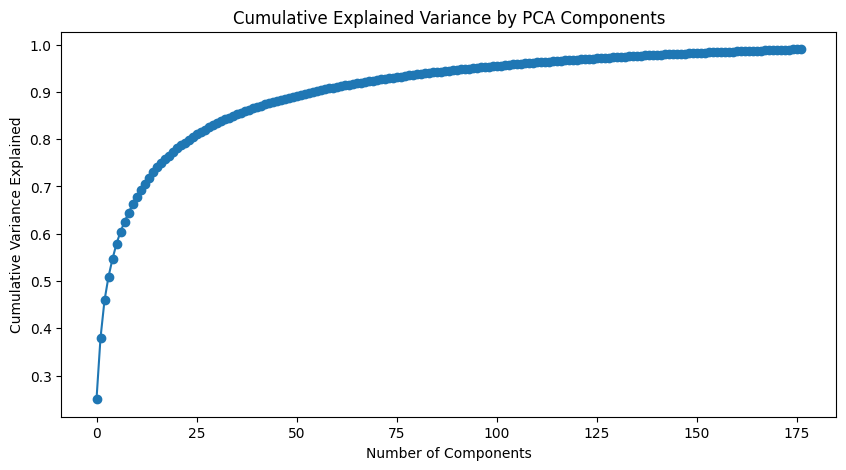

In [8]:
# Plot the cumulative variance explained by PCA
plt.figure(figsize=(10, 5))
plt.plot(pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.show()

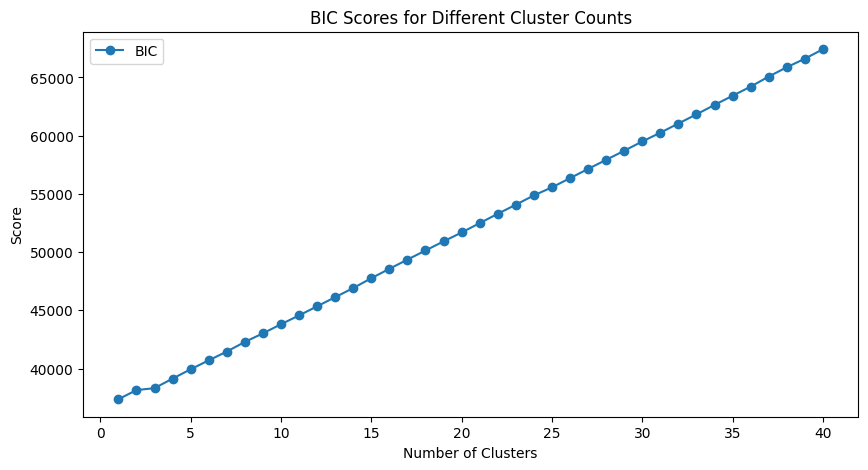

In [9]:
# Plot BIC scores
plt.figure(figsize=(10, 5))
plt.plot(n_components_range, bic_scores, label='BIC', marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.legend()
plt.title("BIC Scores for Different Cluster Counts")
plt.show()

**7. Output the hard clustering assignments for each instance to identify which cluster each image belongs to.**

In [10]:
# Create Gaussian Mixture Model with optimal number of clusters based on AIC
gmm = GaussianMixture(n_components=optimal_clusters_bic, covariance_type=best_cov_type, random_state=42)

# Fit the GMM to the PCA-transformed training data
gmm.fit(X_train_pca)

# Perform hard clustering on the PCA-transformed test data
hard_assignments = gmm.predict(X_test_pca)
print(hard_assignments)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


**8. Output the soft clustering probabilities for each instance to show the likelihood of each image belonging to each cluster.**

In [11]:
# Calculate soft clustering probabilities for each instance
soft_assignments = gmm.predict_proba(X_test_pca)
print(soft_assignments)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


**9. Use the model to generate some new faces (using the sample() method) and visualize them (use the inverse_transform() method to transform the data back to its original space based on the PCA method used).**

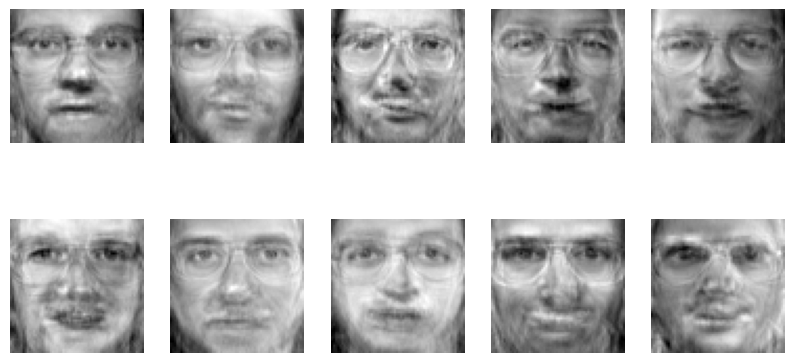

In [12]:
samples, _ = gmm.sample(10)  # Generate 10 new samples
faces = pca.inverse_transform(samples)  # Transform back to original space

# Visualize generated faces
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces[i].reshape(64, 64), cmap="gray")
    ax.axis('off')
plt.show()

**10. Modify some images (e.g., rotate, flip, darken).**

In [13]:
# Create a copy of the first 10 images from the test set
modified_images = np.copy(X_test[:10])

# Reshape the images to their original dimensions
modified_images = modified_images.reshape(-1, 64, 64)

# Rotate the first image
modified_images[0] = np.rot90(modified_images[0])

# Flip the second image
modified_images[1] = np.fliplr(modified_images[1])

# Darken the third image
modified_images[2] = modified_images[2] * 0.5

# Reshape the modified images back to the flattened format
modified_images = modified_images.reshape(-1, 64*64)

**11. Determine if the model can detect the anomalies produced in step 10 by comparing the output of the score_samples() method for normal images and for anomalies.**

In [14]:
# Calculate the scores for normal images
normal_scores = gmm.score_samples(X_test_pca)

# Calculate the scores for anomaly images
anomaly_scores = gmm.score_samples(pca.transform(modified_images))

print("Normal image scores:", normal_scores[:10])
print()
print("Anomaly image scores:", anomaly_scores)

Normal image scores: [-230.21553219 -206.67103164 -259.25780797 -200.22581859 -238.59852406
 -204.77716785 -268.65897181 -258.80142455 -222.23118054 -222.9062247 ]

Anomaly image scores: [-321.26601804 -212.31983026 -217.46790223 -200.22581859 -238.59852406
 -204.77716785 -268.65897181 -258.80142455 -222.23118054 -222.9062247 ]
